## Heart Disease Dataset

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

1.Load the dataset

In [2]:
df = pd.read_csv("/Users/emirhanozcan/Desktop/Makine Öğrenmesi/Heart-Disease-Dataset/heart.csv")

2.Separating independent variables (X) and dependent variables (y)

In [3]:
X = df.iloc[:,:-1].values 
y= df.iloc[:,-1].values

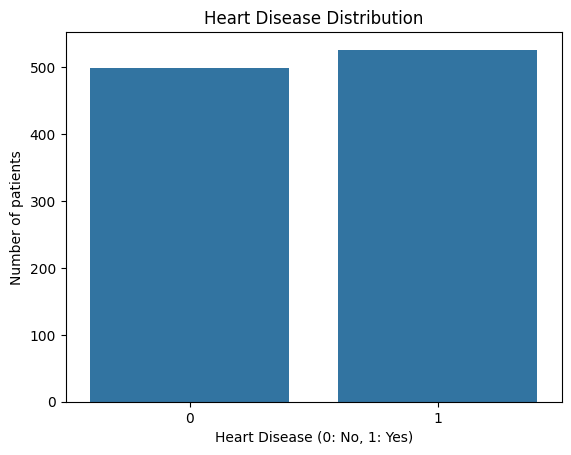

In [4]:
import seaborn as sns
sns.countplot(x=df["target"])
plt.xlabel("Heart Disease (0: No, 1: Yes)")
plt.ylabel("Number of patients")
plt.title("Heart Disease Distribution")
plt.show()

3.Filling in missing data (with SimpleImputer)



In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X[:,1:])
X[:,1:]=imputer.transform(X[:,1:])
print("First 10 rows of X after filling in missing data:")
print(pd.DataFrame(X).sample(10))
print("\nDependent variable (y) 10 values:")
print(y[:10])

First 10 rows of X after filling in missing data:
       0    1    2      3      4    5    6      7    8    9    10   11   12
757  66.0  1.0  0.0  160.0  228.0  0.0  0.0  138.0  0.0  2.3  2.0  0.0  1.0
436  59.0  0.0  0.0  174.0  249.0  0.0  1.0  143.0  1.0  0.0  1.0  0.0  2.0
255  62.0  0.0  0.0  140.0  394.0  0.0  0.0  157.0  0.0  1.2  1.0  0.0  2.0
759  61.0  0.0  0.0  130.0  330.0  0.0  0.0  169.0  0.0  0.0  2.0  0.0  2.0
463  43.0  1.0  0.0  110.0  211.0  0.0  1.0  161.0  0.0  0.0  2.0  0.0  3.0
72   56.0  1.0  0.0  125.0  249.0  1.0  0.0  144.0  1.0  1.2  1.0  1.0  2.0
194  67.0  1.0  0.0  160.0  286.0  0.0  0.0  108.0  1.0  1.5  1.0  3.0  2.0
456  47.0  1.0  2.0  108.0  243.0  0.0  1.0  152.0  0.0  0.0  2.0  0.0  2.0
38   64.0  1.0  0.0  128.0  263.0  0.0  1.0  105.0  1.0  0.2  1.0  1.0  3.0
963  57.0  0.0  0.0  140.0  241.0  0.0  1.0  123.0  1.0  0.2  1.0  0.0  3.0

Dependent variable (y) 10 values:
[0 0 0 0 0 1 0 0 0 0]


4.Checking for missing data

In [6]:
print("\nData control after filling")
print(df.isnull().sum())


Data control after filling
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


5.Coding dependent and independent variables

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 1 0]


6.Splitting the dataaset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train[:3])
print(X_test[:3])
print(y_train[:3])
print(y_test[:3])

[[ 57.    1.    0.  132.  207.    0.    1.  168.    1.    0.    2.    0.
    3. ]
 [ 59.    1.    3.  134.  204.    0.    1.  162.    0.    0.8   2.    2.
    2. ]
 [ 62.    0.    0.  150.  244.    0.    1.  154.    1.    1.4   1.    0.
    2. ]]
[[ 60.    1.    0.  117.  230.    1.    1.  160.    1.    1.4   2.    2.
    3. ]
 [ 51.    0.    2.  130.  256.    0.    0.  149.    0.    0.5   2.    0.
    2. ]
 [ 42.    1.    1.  120.  295.    0.    1.  162.    0.    0.    2.    0.
    2. ]]
[1 0 0]
[0 1 1]


7.Training the Simple Logistic Regression model on the Training set

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy rate: {accuracy * 100 :.2f}%")
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy rate: 80.49%
Confusion Matrix:
[[80 29]
 [11 85]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


8.Visualing the Training set results 

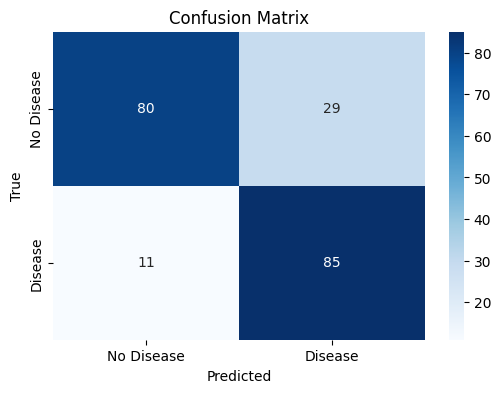

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

